<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

**Hierarchical Clustering with Scikit-Learn**
* Preprocessing the Data: Scale the data if necessary.
* Compute the Linkage Matrix: Use the linkage function from the scipy.cluster.hierarchy module.
* Plot the Dendrogram: Use the dendrogram function to visualize the hierarchical clustering.
* Creating Clusters: Use AgglomerativeClustering from Scikit-Learn to create a specified number of clusters based on the dendrogram.
**K-Means Clustering with Scikit-Learn**
1. Preprocessing the Data: As with hierarchical clustering, ensure your data is appropriately scaled.
2. Initializing the K-Means Model: Use KMeans from Scikit-Learn, with options like 'k-means++' for initialization and setting the number of clusters.
3. Fitting the Model: Apply .fit() on the dataset to compute K-Means clustering.
Analyzing the Results: Use the cluster centers and labels to analyze the clusters formed.

**Step 1: Data Generation and Preprocessing**

First, we need a dataset. We'll use Scikit-Learn's **make_blobs** function to generate a synthetic dataset, which is useful for clustering because we can control the number of clusters and their dispersion. After generating the data, we'll scale it using **StandardScale**r. Scaling is important for clustering algorithms to ensure that all features contribute equally to the distance calculations.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generating a synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.7)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Step 2: Hierarchical Clustering - Dendrogram Visualization**

We will use hierarchical clustering to analyze this data. To decide the number of clusters, we'll visualize the data using a dendrogram. The linkage function from the scipy.cluster.hierarchy library will be used to perform hierarchical clustering, and then we'll plot a dendrogram.

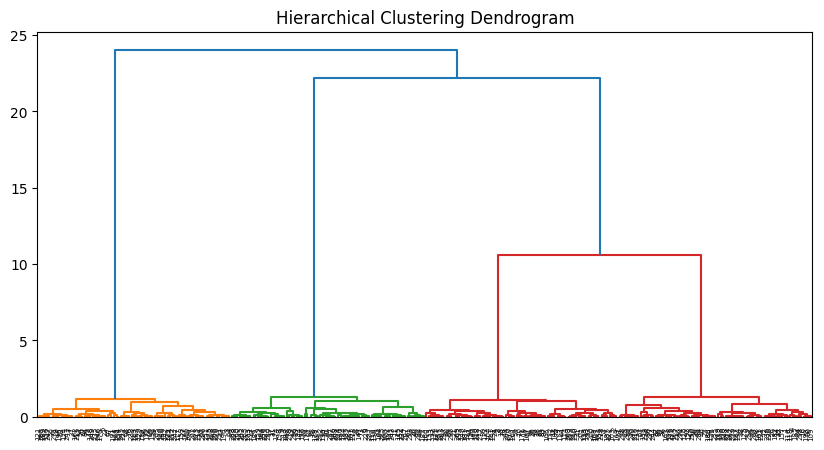

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix for hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


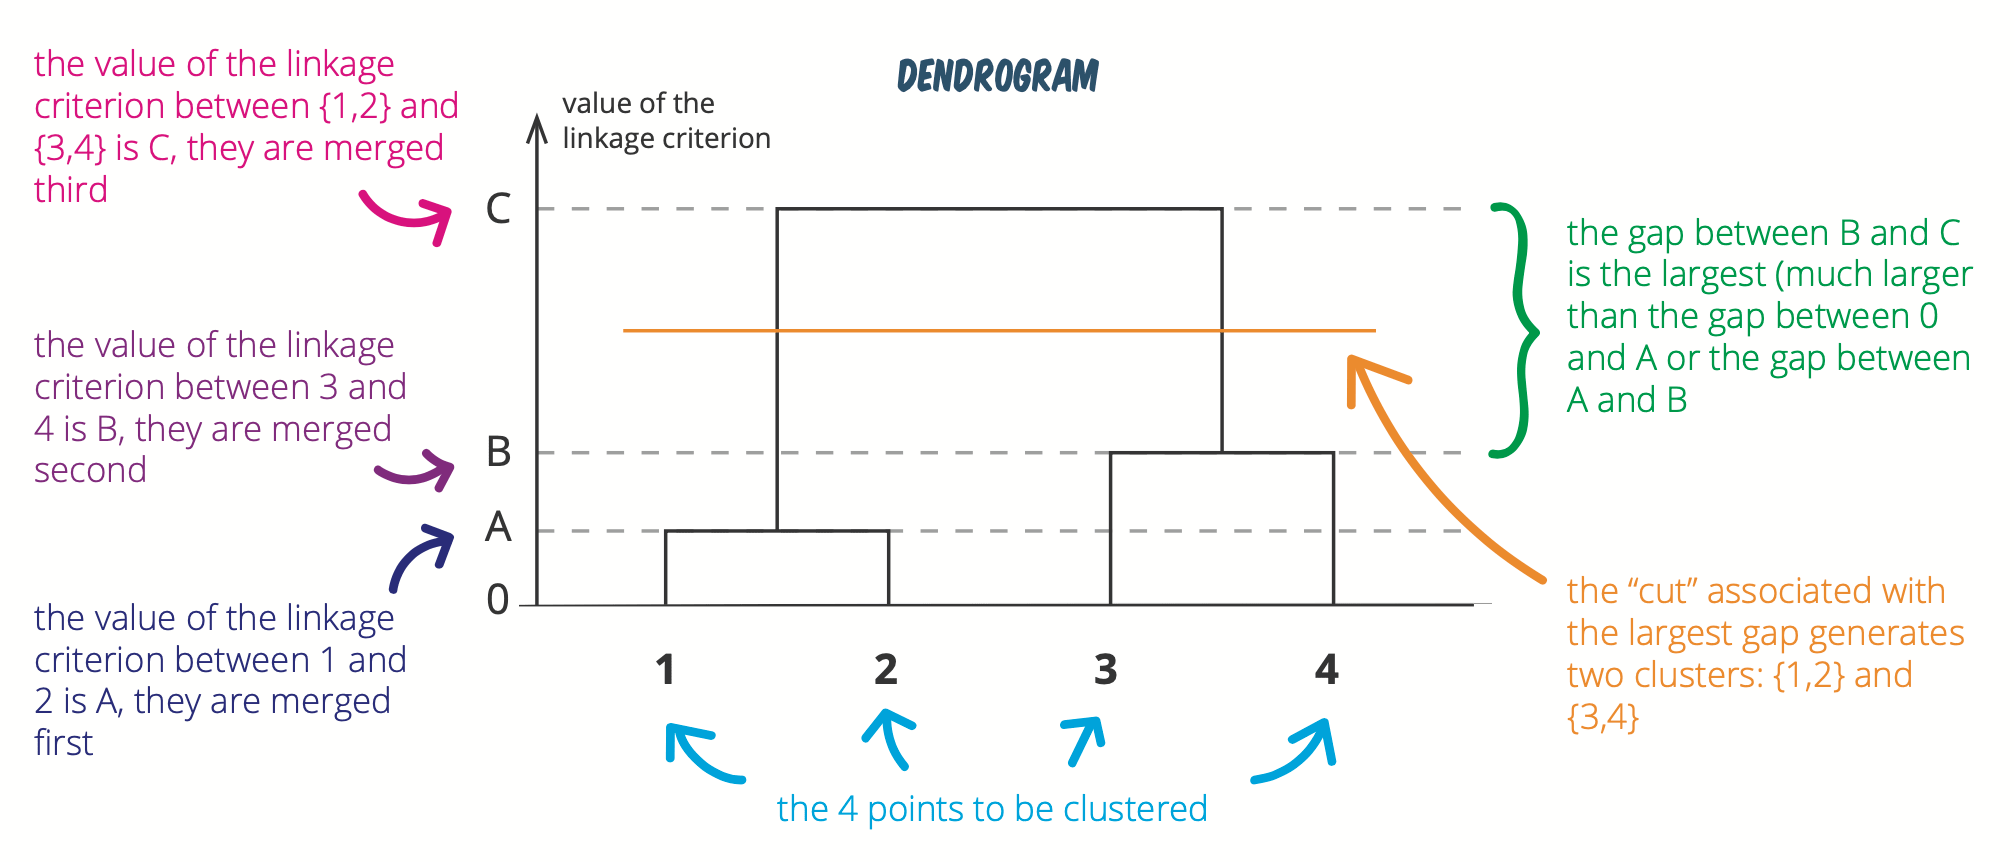

**Step 3: Creating Clusters using Agglomerative Clustering**

Based on the dendrogram, we can decide on the number of clusters (say, 4 for this example). We'll use AgglomerativeClustering from Scikit-Learn to create these clusters.

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Create clusters using Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Step 4: K-Means Clustering**

Next, we'll apply K-Means clustering to the same dataset. We'll use the KMeans class from Scikit-Learn, specifying 4 clusters and using 'k-means++' for initialization.

In [4]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Step 5: Visualizing the Results**

Finally, let's visualize the results of both clustering methods for comparison. We'll plot the clusters identified by each method side by side.

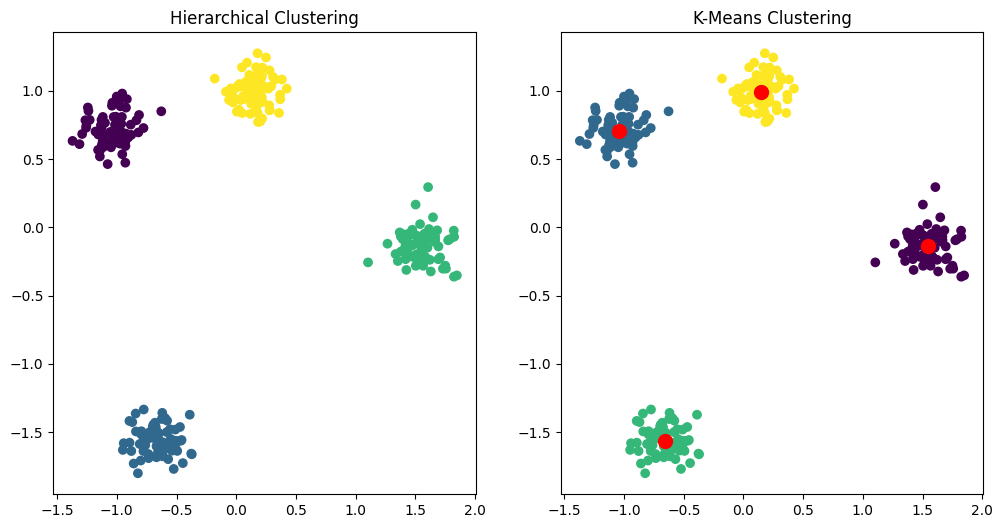

In [5]:
# Visualizing the results
plt.figure(figsize=(12, 6))

# Hierarchical Clustering
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels)
plt.title("Hierarchical Clustering")

# K-Means Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red')
plt.title("K-Means Clustering")

plt.show()


In [6]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()


Saving Cuisine_rating.csv to Cuisine_rating.csv


In [7]:
import pandas as pd

# Load the data
file_path = 'Cuisine_rating.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


The Cuisine_rating.csv file contains data about users, including demographic information and their ratings for various aspects of cuisine. To perform hierarchical clustering, we should focus on the numerical columns that represent user preferences and behaviors.

Given the nature of the data, the following columns seem relevant for clustering:

**Budget**  

**Food Rating**

**Service Rating**

**Overall Rating**
We'll exclude non-numerical and less relevant columns such as User ID, Area code, Location, Gender, YOB, Marital Status, Activity, Cuisines, Alcohol, Smoker, and Often A S.


The dendrogram above represents the hierarchical clustering of the dataset based on the selected features (**Budget, Food Rating, Service Rating, Overall Rating**).

Each vertical line represents a data point (a user in this case).
The height of the horizontal lines indicates the distance at which the respective clusters were merged.
You can interpret the dendrogram starting from the bottom, where each data point is its own cluster, and moving upwards, where clusters are progressively merged. The height at which two clusters are joined represents the distance between these clusters in the feature space.

To determine an optimal number of clusters, you would look for the longest vertical lines that aren't intersected by extended horizontal lines. These represent points in the hierarchy where joining clusters results in a significant increase in distance, suggesting a natural division in the data.

Based on this dendrogram, you can decide how many clusters are appropriate for your analysis and cut the dendrogram at the corresponding height to obtain cluster labels for each data point.


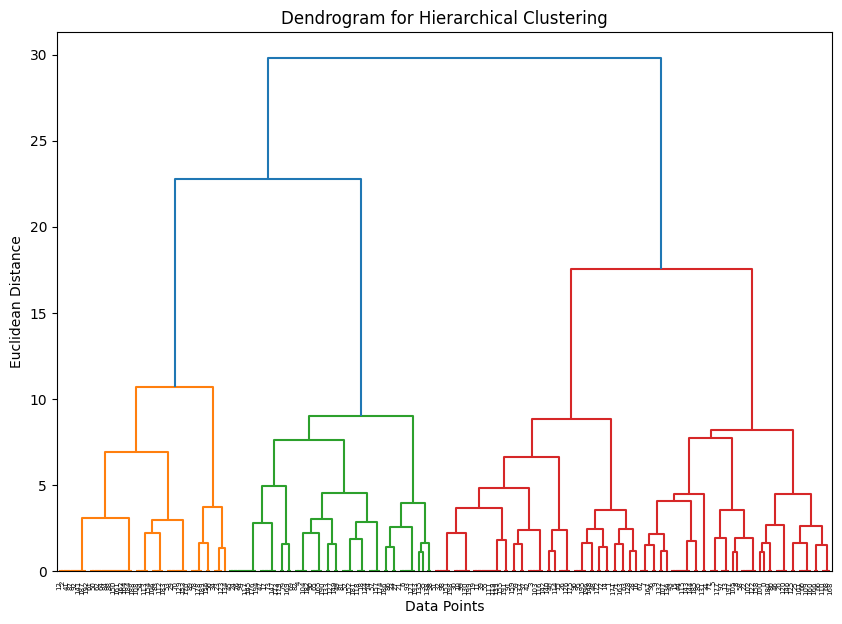

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Selecting relevant columns for clustering
clustering_data = data[['Budget', 'Food Rating', 'Service Rating', 'Overall Rating']]

# Hierarchical clustering using the Ward method
linked = linkage(clustering_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


For my dataset, these steps were applied as follows:

**Data Preparation:** Selected Budget, Food Rating, Service Rating, and Overall Rating.

**Distance Metric:** Used Euclidean distance.

**Linkage Criterion:** Chose Ward's method.

**Dendrogram Construction:** Built the dendrogram to visualize the hierarchical clustering.

The dendrogram has been constructed using Ward's method. This dendrogram visualizes the process of hierarchical clustering:

* Each leaf at the bottom represents a data point (in our case, a user).
*As you move up the tree, the data points are merged into clusters.
*The vertical lines represent the clusters being formed, with the height of the merge representing the distance at which clusters are combined.

**Number of Clusters:** Decided to cut the dendrogram to form a certain number of clusters (arbitrarily chosen as 5 in this case).

**Extracted Cluster Labels:** Assigned each user to one of the five clusters.

**Result Analysis:** The clusters can be analyzed to understand user behavior and preferences.
This approach provides insights into how users can be grouped based on their preferences and behaviors, which can be valuable for marketing, user experience design, and other business strategies.

In [9]:
# Re-importing the fcluster function from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

# Applying fcluster to extract the cluster labels for 5 clusters
hc_labels = fcluster(linked, t=5, criterion='maxclust')

# Adding hierarchical clustering labels to the original dataframe
clustered_data_hc = data.copy()
clustered_data_hc['HC_Cluster'] = hc_labels

# Displaying the first few rows of the dataframe with hierarchical clustering labels
clustered_data_hc.head()


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,HC_Cluster
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,1
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,2
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,5
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,2
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,3


In [11]:
# Importing Libraries

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image
import scipy.cluster.hierarchy as sch

#uploaded = files.upload()

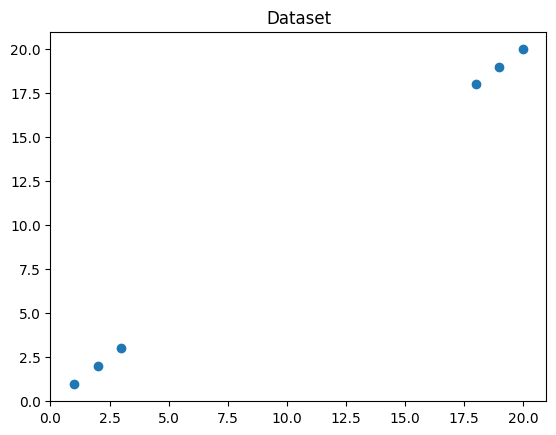

In [12]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()


Text(0, 0.5, 'Euclidean distance in the space with other variables')

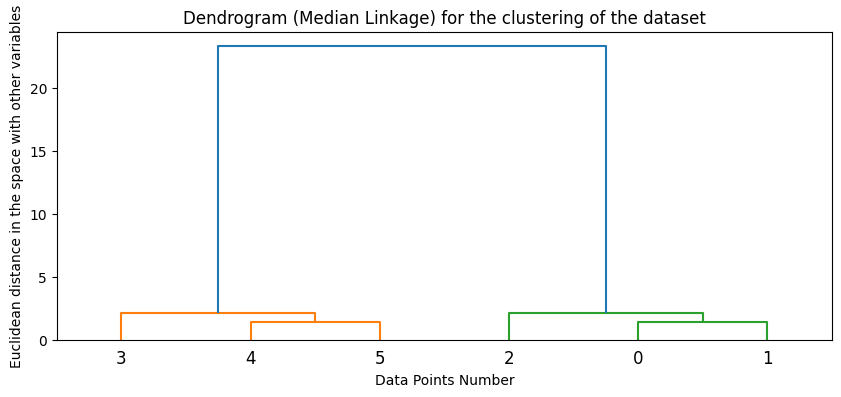

In [13]:
# Dendrogram (Median Linkage)

Z = sch.linkage(data, method = 'median')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Median Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

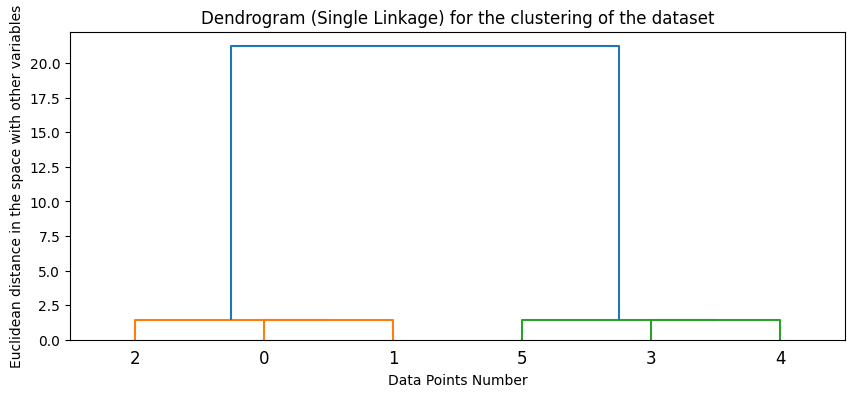

In [14]:
# Dendrogram (Single Linkage)

Z = sch.linkage(data, method = 'single')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

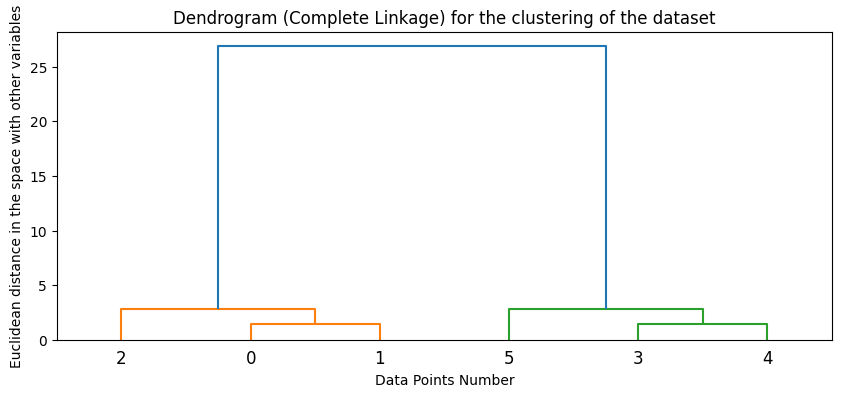

In [15]:
# Dendrogram (Complete Linkage)

Z = sch.linkage(data, method = 'complete')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

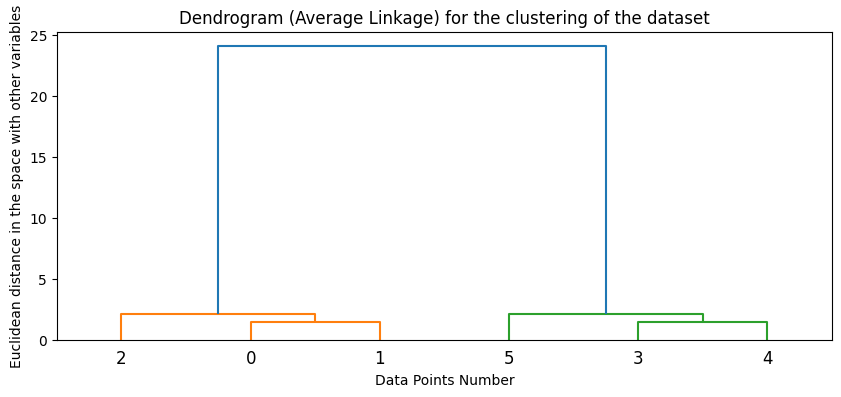

In [16]:
# Dendrogram (Average Linkage)

Z = sch.linkage(data, method = 'average')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [17]:
# Building an Agglomerative Clustering Model : Initialise Model
# We analyse the above-created dendrogram
# decide that we will be making 2 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=2,linkage= 'average')
# Model Fit
model_clt = cluster_H.fit(data)
print(model_clt)
print('\n')

data['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(data['clusters'])

AgglomerativeClustering(linkage='average')


Clusters assigned to each datapoints, cluster = 2 :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int64


In [18]:

# Silhouette Score
data = pd.DataFrame({'x':x_axis, 'y':y_axis})
for k in range(2,6):# Maximum range should be 6, as it contains only 6 data points
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2')

For cluster= 2, Silhouette Coefficient is 0.9213643790849674
For cluster= 3, Silhouette Coefficient is 0.5428175766885445
For cluster= 4, Silhouette Coefficient is 0.16666666666666666
For cluster= 5, Silhouette Coefficient is 0.08333333333333333


For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2


In [19]:

# Lets take another example : IRIS DATASET
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
# Now we will separate the target variable from the original dataset
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


{0: 50, 1: 50, 2: 50}

In [23]:

# Preparing Data
# Here we have the target variable ‘Type’.
# We need to remove the target variable, used to work in an unsupervised learning
# The iloc function is used to get the features we require.
# We also use .values function to get an array of the dataset.
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [21]:

# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool
Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3


Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

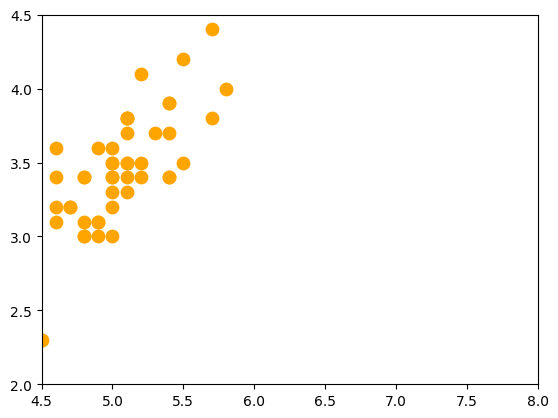

In [24]:
# Filtering Setosa for 2D Plot

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1],
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [25]:
# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
50                7.0               3.2
51                6.4               3.2
52                6.9               3.1
53                5.5               2.3
54                6.5               2.8
Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
95                5.7               3.0
96                5.7               2.9
97                6.2               2.9
98                5.1               2.5
99                5.7               2.8


Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

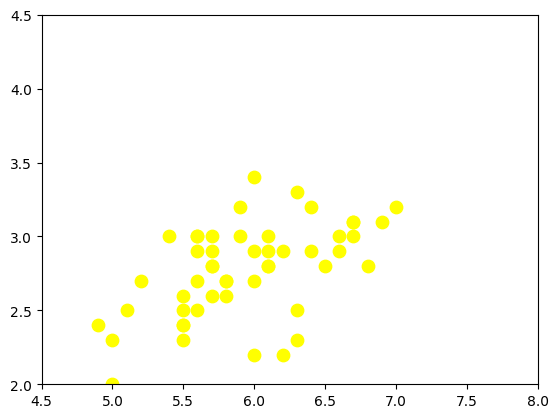

In [26]:

# Filtering Versicolour for 2D Plot

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1],
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [27]:

# Filtering Virginica

Virginica = iris_data['Type'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

Filtering Virginica, True means its Virginica and False means Non Virginica
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
100                6.3               3.3
101                5.8               2.7
102                7.1               3.0
103                6.3               2.9
104                6.5               3.0
Last 6 Rows of Virginica
     sepal length (cm)  sepal width (cm)
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0


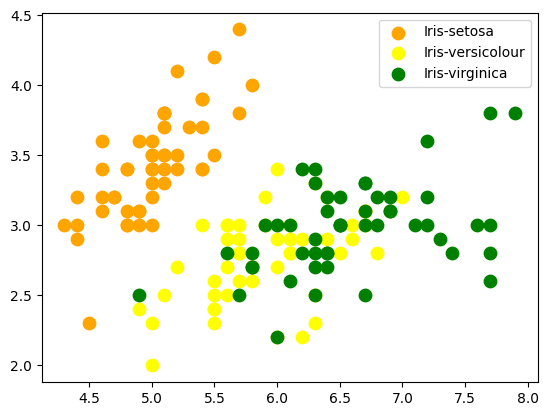

In [28]:
# Visualise Classes all at once

# In this Iris dataset, we have three classes (0,1,2)
# We visualise these classes in a 2-D graph
# This will help us in comparing the original classes with the clusters created
# Plot the three type of flowers on a graph

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1],
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1],
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference :
# We find that we have three classes with two types of Iris flowers overlapping each other

In [29]:

# Plotting of Dendrogram

# We make use of dendrogram to decide the number of clusters required for our dataset
# A dendrogram is a tree diagram which illustrates the arrangement of clusters.
import scipy.cluster.hierarchy as sch

# Pick the features from the original dataset
# We don't need Target Column in Clustering
iris_X_1 = iris_data[['sepal length (cm)','sepal width (cm)',
                      'petal length (cm)','petal width (cm)']]
iris_X_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Euclidean distance in the space with other variables')

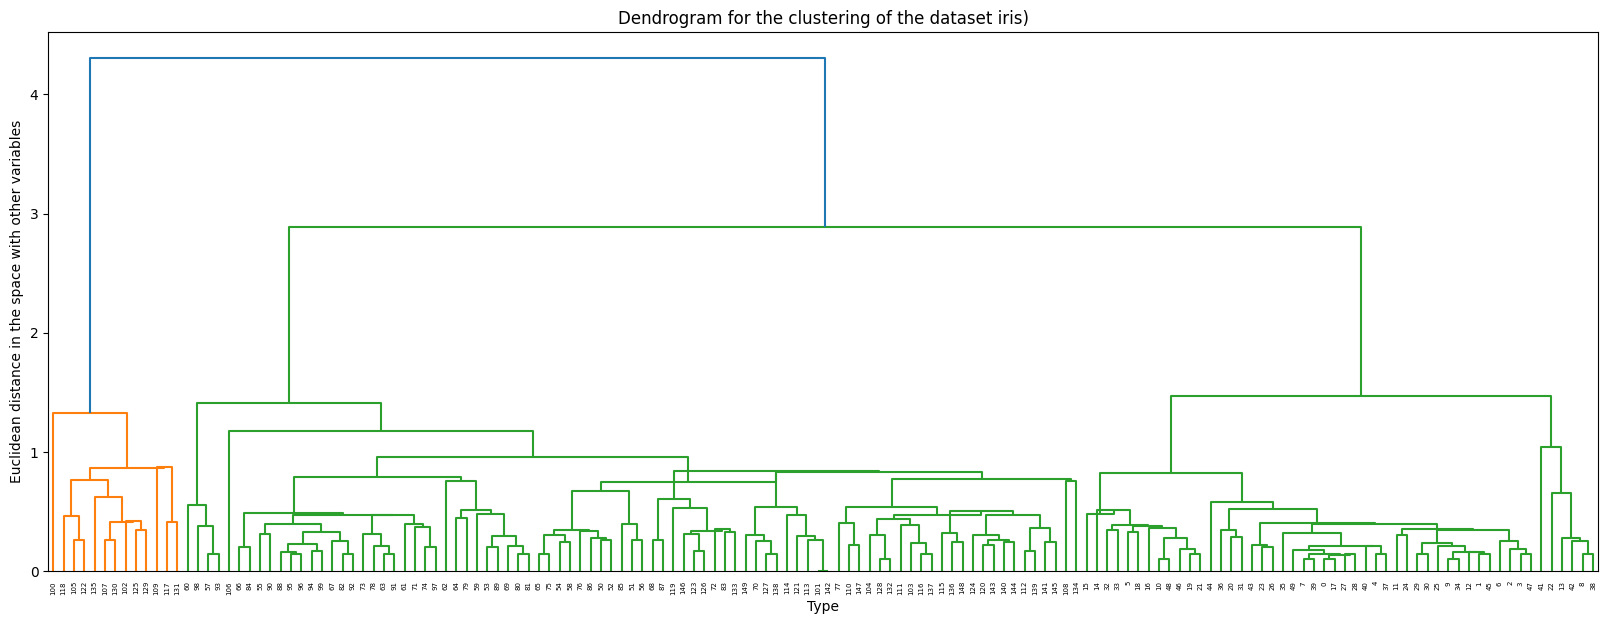

In [30]:
# We finally plot a Dendrogram
# which helps us in deciding what the threshold values should be for the clustering algorithm
# Basically, we decide the number of clusters by using this dendrogram.

Z = sch.linkage(iris_X_1, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

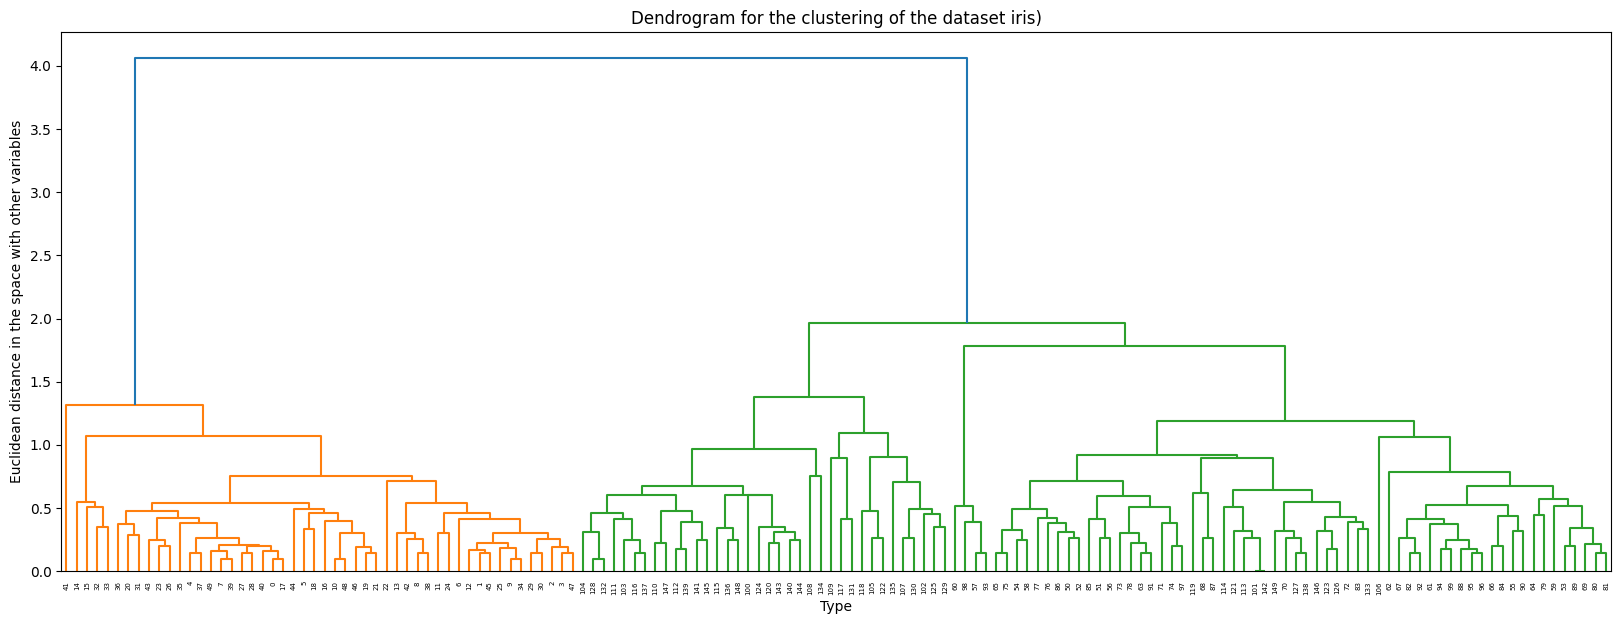

In [31]:
# Average Linkage - Average Distance between all points

Z = sch.linkage(iris_X_1, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')


In [32]:
# Building an Agglomerative Clustering Model
# Initialise Model
# We analyse the above-created dendrogram
# decide that we will be making 3 clusters for this dataset

cluster_H = AgglomerativeClustering(n_clusters=3,linkage = 'average')

# Fitting Model
# After building Agglomerative clustering, we will fit our iris data set
# Note that only the independent variables from the Iris dataset
# are taken into account for the purpose of clustering

model_clt = cluster_H.fit(iris_X_1)
model_clt

AgglomerativeClustering(linkage='average', n_clusters=3)

In [33]:
# Predicting Output Class

print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
{0: 64, 1: 50, 2: 36}


Original Cluster
{0: 50, 1: 50, 2: 50}
Hierarchical Clustering Output Cluster
{0: 64, 1: 50, 2: 36}
Silhouette Score for 3 Clusters
0.5541608580282851


For cluster= 2, Silhouette Coefficient is 0.6867350732769777
For cluster= 3, Silhouette Coefficient is 0.5541608580282851
For cluster= 4, Silhouette Coefficient is 0.47199360849942534
For cluster= 5, Silhouette Coefficient is 0.4306699739542554
For cluster= 6, Silhouette Coefficient is 0.3419903827983001
For cluster= 7, Silhouette Coefficient is 0.3707424079292073
For cluster= 8, Silhouette Coefficient is 0.3658753388418651
For cluster= 9, Silhouette Coefficient is 0.31668069036181595


For Cluster = 2, it has highest Silhouette Value
But according to Visualization and data, Number of Cluster is 3


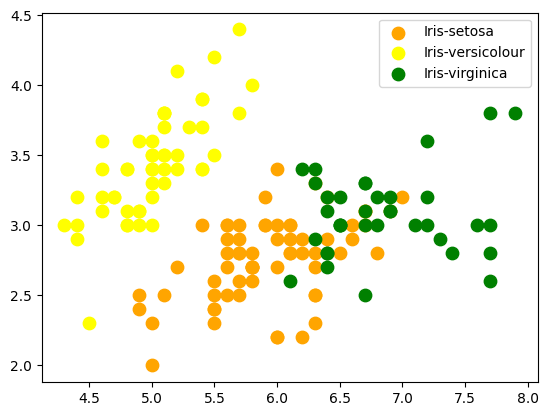

In [34]:


# Visualizing Output

print('Original Cluster')
print(freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print('Hierarchical Clustering Output Cluster')
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 3 Clusters')
print(silhouette_score(iris_X,pred1))
print('\n')

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

# We use the above-found class labels and visualise how the clusters have been formed.

plt.scatter(iris_X[pred1 == 0, 0], iris_X[pred1 == 0, 1],
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred1 == 1, 0], iris_X[pred1 == 1, 1],
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred1 == 2, 0], iris_X[pred1 == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()

# Inference :
# When compared to the original classes we find that the observations of the class label
# "1" has been correctly formed into a separate well-defined cluster
# however, for the other two classes, clusters are not as correct.
# This is mainly because, in the original dataset, these two class labels were overlapping each other
# which makes it difficult for the clustering algorithm as it works best for clear neat separate observations.
# Still, the clusters have been formed, more or less correctly

for k in range(2,10):
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(iris_X)
  label = model_clt.labels_
  sil_coeff = silhouette_score(iris_X,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value')
print('But according to Visualization and data, Number of Cluster is 3')